In [1]:
# For classic ML models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# For deep learning models
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the dataset
data = pd.read_csv('data_cleaned.csv')

# Display the first few rows to understand the structure
data.head()

,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,342,0,0,0,4.0,0.0,0,1,9.0,0,...,1.60,71.67,27.99,0,0,1,1,0,0,0
1,343,0,1,0,0.0,0.0,0,1,6.0,0,...,1.78,95.25,30.13,0,0,1,1,1,0,0
2,345,0,1,0,0.0,0.0,0,0,8.0,1,...,1.85,108.86,31.66,1,0,0,1,2,0,1
3,346,0,0,1,5.0,0.0,0,1,9.0,0,...,1.70,90.72,31.32,0,0,1,1,2,0,1
4,347,0,0,2,3.0,15.0,0,1,5.0,2,...,1.55,79.38,33.07,0,0,1,1,2,0,0


In [3]:
corr = data.corr()
strong_correlation_cols = [col for col in corr.columns if corr.loc['HadHeartAttack', col] >= 0.1 and col != 'HadHeartAttack']

# Select features (X) and target (y)
X = data[strong_correlation_cols]
y = data['HadHeartAttack']

strong_correlation_cols

['PhysicalHealthDays',
 'RemovedTeeth',
 'HadAngina',
 'HadStroke',
 'HadCOPD',
 'HadKidneyDisease',
 'HadArthritis',
 'DifficultyWalking',
 'ChestScan',
 'AgeCategory',
 'PneumoVaxEver']

In [4]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"Warning: Column {col} is still of type 'object'. Attempting to convert.")

    data[col] = data[col].astype('int', errors='ignore')


#X = data.drop('HadHeartAttack', axis=1)
X = data[strong_correlation_cols]
y = data['HadHeartAttack'].astype('int')


In [5]:
x=data[strong_correlation_cols]
y=data['HadHeartAttack']

#from imblearn.over_sampling import SMOTE

#resampler = SMOTE()
#x,y = resampler.fit_resample(x,y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE

resampler = SMOTE()
X_train,y_train = resampler.fit_resample(x,y)


print("train set features shape:", X_train.shape)
print("test set features shape:", X_test.shape)
print("train set objective shape:", y_train.shape)
print("test set objective shape:", y_test.shape)

train set features shape: (465156, 11)
test set features shape: (49203, 11)
train set objective shape: (465156,)
test set objective shape: (49203,)


In [7]:
# Model Evaluation
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Generate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=1)

    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')

    # draw confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Heart Disease', 'Heart Disease'])
    disp.plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # calculate AUC-ROC
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        print(f"{model_name} AUC-ROC: {roc_auc:.2f}")

    return accuracy

In [8]:
# PR Curve
def plot_pr_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    plt.plot(recall, precision, label=f"{model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for {model_name}")
    plt.legend()
    plt.show()

Epoch 1/30 - Train Loss: 0.4988 - Test Loss: 0.5087 - Train Acc: 0.7508 - Test Acc: 0.7458
Epoch 2/30 - Train Loss: 0.4725 - Test Loss: 0.4320 - Train Acc: 0.7638 - Test Acc: 0.8120
Epoch 3/30 - Train Loss: 0.4704 - Test Loss: 0.4224 - Train Acc: 0.7646 - Test Acc: 0.8257
Epoch 4/30 - Train Loss: 0.4689 - Test Loss: 0.3942 - Train Acc: 0.7654 - Test Acc: 0.8504
Epoch 5/30 - Train Loss: 0.4679 - Test Loss: 0.4626 - Train Acc: 0.7659 - Test Acc: 0.7776
Epoch 6/30 - Train Loss: 0.4672 - Test Loss: 0.5910 - Train Acc: 0.7664 - Test Acc: 0.6476
Epoch 7/30 - Train Loss: 0.4664 - Test Loss: 0.4747 - Train Acc: 0.7668 - Test Acc: 0.7632
Epoch 8/30 - Train Loss: 0.4656 - Test Loss: 0.4298 - Train Acc: 0.7675 - Test Acc: 0.8216
Epoch 9/30 - Train Loss: 0.4649 - Test Loss: 0.4409 - Train Acc: 0.7682 - Test Acc: 0.8165
Epoch 10/30 - Train Loss: 0.4641 - Test Loss: 0.4978 - Train Acc: 0.7689 - Test Acc: 0.7444
Epoch 11/30 - Train Loss: 0.4636 - Test Loss: 0.4122 - Train Acc: 0.7695 - Test Acc: 0.82

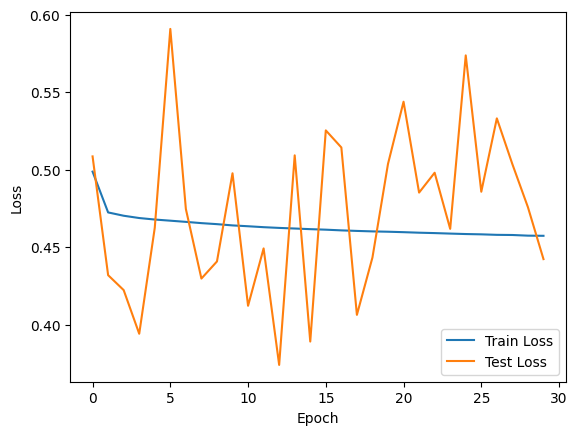

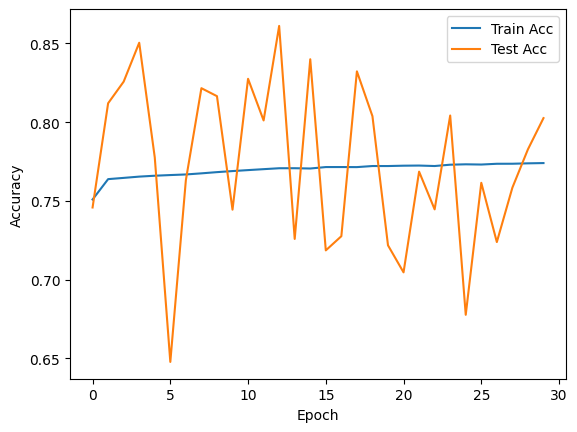

Test Accuracy: 0.8026
Confusion Matrix:
[[37484  9074]
 [  641  2004]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     46558
           1       0.18      0.76      0.29      2645

    accuracy                           0.80     49203
   macro avg       0.58      0.78      0.59     49203
weighted avg       0.94      0.80      0.85     49203

ROC AUC: 0.8740


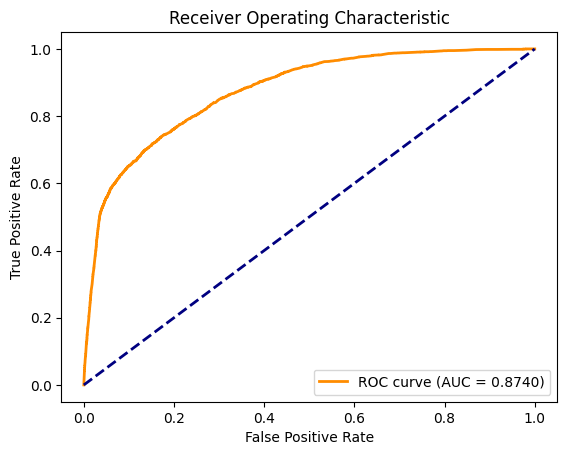

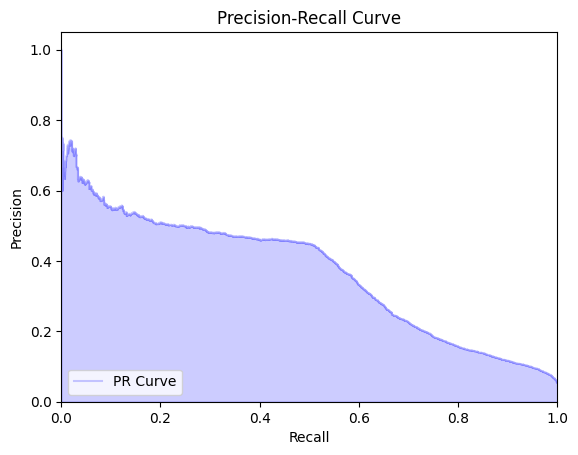

In [9]:
from sklearn.metrics import roc_curve, auc

class HeartDiseaseModel(nn.Module):
    def __init__(self, input_size):
        super(HeartDiseaseModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        #self.leaky_relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        #x = self.leaky_relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        #x = self.leaky_relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        #x = self.leaky_relu(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# define training function
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()
            predicted_train = (output > 0.5).float()
            total_train += target.size(0)
            correct_train += (predicted_train == target).sum().item()

        train_loss = running_train_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        running_test_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                loss = criterion(output, target)
                running_test_loss += loss.item()
                predicted_test = (output > 0.5).float()
                total_test += target.size(0)
                correct_test += (predicted_test == target).sum().item()

        test_loss = running_test_loss / len(test_loader)
        test_accuracy = correct_test / total_test
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch + 1}/{num_epochs} - "
              f"Train Loss: {train_loss:.4f} - Test Loss: {test_loss:.4f} - "
              f"Train Acc: {train_accuracy:.4f} - Test Acc: {test_accuracy:.4f}")

    return train_losses, test_losses, train_accuracies, test_accuracies

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    y_pred = []
    y_true = []
    y_prob = []

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            predicted = (output > 0.5).float()
            total += target.size(0)
            correct += (predicted == target).sum().item()

            y_prob.extend(output.cpu().numpy())  # record the prediction probability
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(target.cpu().numpy())

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')

    # Calculate confusion matrix and classification report
    from sklearn.metrics import confusion_matrix, classification_report
    y_pred = np.array(y_pred).astype(int)
    y_true = np.array(y_true).astype(int)
    print('Confusion Matrix:')
    print(confusion_matrix(y_true, y_pred))
    print('Classification Report:')
    print(classification_report(y_true, y_pred))

    # ROC-AUC
    y_prob = np.array(y_prob).ravel()
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    print(f'ROC AUC: {roc_auc:.4f}')

    # ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # PR related indicators
    precision, recall, thresholds_pr = precision_recall_curve(y_true, y_prob)

    # PR-Curve
    plt.figure()
    plt.step(recall, precision, where='post', color='b', alpha=0.2, label='PR Curve')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()


# Data Transformation to PyTorch tensor
X_train_tensor = torch.from_numpy(X_train.values).float()
y_train_tensor = torch.from_numpy(y_train.values).float().unsqueeze(1)
X_test_tensor = torch.from_numpy(X_test.values).float()
y_test_tensor = torch.from_numpy(y_test.values).float().unsqueeze(1)

# Create data sets and data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = HeartDiseaseModel(input_size)
criterion = nn.BCELoss()
#optimizer = optim.Adam(model.parameters(), lr=0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Using the SGD optimizer, the learning rate is set to 0.01

# train the model
num_epochs = 30
train_losses, test_losses, train_accuracies, test_accuracies = train_model(
    model, train_loader, test_loader, criterion, optimizer, num_epochs)

# loss graph
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# accuracy curve
plt.plot(train_accuracies, label='Train Acc')
plt.plot(test_accuracies, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_model(model, test_loader)

In [ ]:
# add more features in it

In [10]:
corr = data.corr()
strong_correlation_cols = [col for col in corr.columns if corr.loc['HadHeartAttack', col] >= 0.05 and col != 'HadHeartAttack']

# Select features (X) and target (y)
X = data[strong_correlation_cols]
y = data['HadHeartAttack']

strong_correlation_cols

['Sex',
 'GeneralHealth',
 'PhysicalHealthDays',
 'RemovedTeeth',
 'HadAngina',
 'HadStroke',
 'HadCOPD',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'ChestScan',
 'AgeCategory',
 'PneumoVaxEver']

In [12]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"Warning: Column {col} is still of type 'object'. Attempting to convert.")

    data[col] = data[col].astype('int', errors='ignore')

x=data[strong_correlation_cols]
y=data['HadHeartAttack']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE

resampler = SMOTE()
X_train,y_train = resampler.fit_resample(x,y)


print("train set features shape:", X_train.shape)
print("test set features shape:", X_test.shape)
print("train set objective shape:", y_train.shape)
print("test set objective shape:", y_test.shape)

train set features shape: (465156, 19)
test set features shape: (49203, 19)
train set objective shape: (465156,)
test set objective shape: (49203,)


Epoch 1/30 - Train Loss: 0.5074 - Test Loss: 0.5166 - Train Acc: 0.7494 - Test Acc: 0.7373
Epoch 2/30 - Train Loss: 0.4749 - Test Loss: 0.5967 - Train Acc: 0.7650 - Test Acc: 0.6985
Epoch 3/30 - Train Loss: 0.4680 - Test Loss: 0.6278 - Train Acc: 0.7700 - Test Acc: 0.6282
Epoch 4/30 - Train Loss: 0.4635 - Test Loss: 0.4184 - Train Acc: 0.7734 - Test Acc: 0.8184
Epoch 5/30 - Train Loss: 0.4602 - Test Loss: 0.4912 - Train Acc: 0.7761 - Test Acc: 0.7547
Epoch 6/30 - Train Loss: 0.4578 - Test Loss: 0.5558 - Train Acc: 0.7775 - Test Acc: 0.6986
Epoch 7/30 - Train Loss: 0.4560 - Test Loss: 0.4340 - Train Acc: 0.7788 - Test Acc: 0.7940
Epoch 8/30 - Train Loss: 0.4546 - Test Loss: 0.5178 - Train Acc: 0.7801 - Test Acc: 0.7553
Epoch 9/30 - Train Loss: 0.4534 - Test Loss: 0.4514 - Train Acc: 0.7809 - Test Acc: 0.7809
Epoch 10/30 - Train Loss: 0.4525 - Test Loss: 0.5165 - Train Acc: 0.7808 - Test Acc: 0.7376
Epoch 11/30 - Train Loss: 0.4515 - Test Loss: 0.3698 - Train Acc: 0.7813 - Test Acc: 0.84

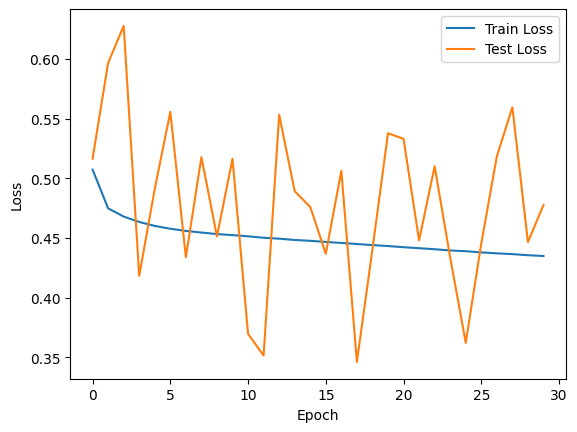

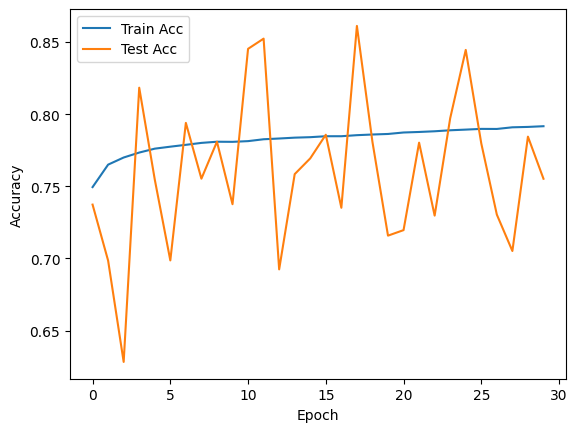

Test Accuracy: 0.7552
Confusion Matrix:
[[35040 11518]
 [  525  2120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85     46558
           1       0.16      0.80      0.26      2645

    accuracy                           0.76     49203
   macro avg       0.57      0.78      0.56     49203
weighted avg       0.94      0.76      0.82     49203

ROC AUC: 0.8658


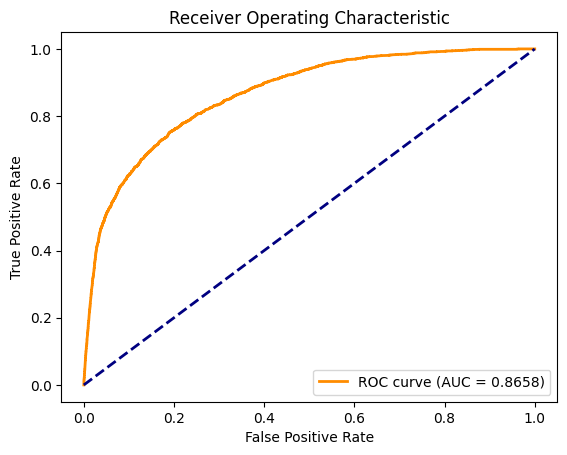

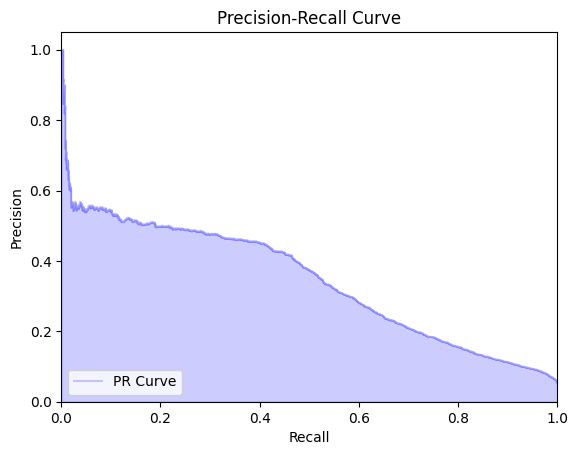

In [13]:
from sklearn.metrics import roc_curve, auc

class HeartDiseaseModel(nn.Module):
    def __init__(self, input_size):
        super(HeartDiseaseModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        #self.leaky_relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        #x = self.leaky_relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        #x = self.leaky_relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        #x = self.leaky_relu(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# define training function
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()
            predicted_train = (output > 0.5).float()
            total_train += target.size(0)
            correct_train += (predicted_train == target).sum().item()

        train_loss = running_train_loss / len(train_loader)
        train_accuracy = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        running_test_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                loss = criterion(output, target)
                running_test_loss += loss.item()
                predicted_test = (output > 0.5).float()
                total_test += target.size(0)
                correct_test += (predicted_test == target).sum().item()

        test_loss = running_test_loss / len(test_loader)
        test_accuracy = correct_test / total_test
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch + 1}/{num_epochs} - "
              f"Train Loss: {train_loss:.4f} - Test Loss: {test_loss:.4f} - "
              f"Train Acc: {train_accuracy:.4f} - Test Acc: {test_accuracy:.4f}")

    return train_losses, test_losses, train_accuracies, test_accuracies

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    y_pred = []
    y_true = []
    y_prob = []

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            predicted = (output > 0.5).float()
            total += target.size(0)
            correct += (predicted == target).sum().item()

            y_prob.extend(output.cpu().numpy())  # record the prediction probability
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(target.cpu().numpy())

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')

    # Calculate confusion matrix and classification report
    from sklearn.metrics import confusion_matrix, classification_report
    y_pred = np.array(y_pred).astype(int)
    y_true = np.array(y_true).astype(int)
    print('Confusion Matrix:')
    print(confusion_matrix(y_true, y_pred))
    print('Classification Report:')
    print(classification_report(y_true, y_pred))

    # ROC-AUC
    y_prob = np.array(y_prob).ravel()
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    print(f'ROC AUC: {roc_auc:.4f}')

    # ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # PR related indicators
    precision, recall, thresholds_pr = precision_recall_curve(y_true, y_prob)

    # PR-Curve
    plt.figure()
    plt.step(recall, precision, where='post', color='b', alpha=0.2, label='PR Curve')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()


# Data Transformation to PyTorch tensor
X_train_tensor = torch.from_numpy(X_train.values).float()
y_train_tensor = torch.from_numpy(y_train.values).float().unsqueeze(1)
X_test_tensor = torch.from_numpy(X_test.values).float()
y_test_tensor = torch.from_numpy(y_test.values).float().unsqueeze(1)

# Create data sets and data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = HeartDiseaseModel(input_size)
criterion = nn.BCELoss()
#optimizer = optim.Adam(model.parameters(), lr=0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Using the SGD optimizer, the learning rate is set to 0.01

# train the model
num_epochs = 30
train_losses, test_losses, train_accuracies, test_accuracies = train_model(
    model, train_loader, test_loader, criterion, optimizer, num_epochs)

# loss graph
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# accuracy curve
plt.plot(train_accuracies, label='Train Acc')
plt.plot(test_accuracies, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_model(model, test_loader)